In [1]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
import config

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [4]:
results= sp.search(q="pop", limit =50, market ="DE")

In [5]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=pop&type=track&market=DE&offset=0&limit=50',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
       'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
       'id': '1Xyo4u8uXC1ZmMpatF05PJ',
       'name': 'The Weeknd',
       'type': 'artist',
       'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/6tbjWDEIzxoDsBA1FuhfPW'},
       'href': 'https://api.spotify.com/v1/artists/6tbjWDEIzxoDsBA1FuhfPW',
       'id': '6tbjWDEIzxoDsBA1FuhfPW',
       'name': 'Madonna',
       'type': 'artist',
       'uri': 'spotify:artist:6tbjWDEIzxoDsBA1FuhfPW'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/5O0zUvdnJr0RbWzLFneN2i'},
     'href': 'https://api.spotify.com/v1/albums/5O0zUvdnJr0RbWzLFneN2i',
     'id': '5O0zUvdnJr0RbWzLFneN2

In [6]:
import pprint

In [7]:
pprint.pprint(results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=pop&type=track&market=DE&offset=0&limit=50',
            'items': [{'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
                                              'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
                                              'id': '1Xyo4u8uXC1ZmMpatF05PJ',
                                              'name': 'The Weeknd',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'},
                                             {'external_urls': {'spotify': 'https://open.spotify.com/artist/6tbjWDEIzxoDsBA1FuhfPW'},
                                              'href': 'https://api.spotify.com/v1/artists/6tbjWDEIzxoDsBA1FuhfPW',
                                  

In [8]:
list(results.keys())

['tracks']

In [9]:
for item in results ["tracks"]["items"]:
    print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))

The name of song is: 'Popular (with Playboi Carti & Madonna) - From The Idol Vol. 1 (Music from the HBO Original Series)' and the id is: 6WzRpISELf3YglGAh7TXcG
The name of song is: 'Dior' and the id is: 79s5XnCN4TJKTVMSmOx8Ep
The name of song is: 'Popular Monster' and the id is: 4GssB27iJeqmfGxS94Tfij
The name of song is: 'Popcorn' and the id is: 45aoC0yE3RZGWz5QPb41M1
The name of song is: 'Poppin' Them Thangs' and the id is: 4E5IFAXCob6QqZaJMTw5YN
The name of song is: 'Pop like this Pt. 2 - Slowed' and the id is: 3xvzR05d6KgexfzjJgDRDl
The name of song is: 'Pop Out (feat. Lil Tjay)' and the id is: 6uFn47ACjqYkc0jADwEdj1
The name of song is: 'Popular Monster' and the id is: 4myFsmx2v6znDOJfn3IkbD
The name of song is: 'POP/STARS' and the id is: 5sbooPcNgIE22DwO0VNGUJ
The name of song is: 'Invincible' and the id is: 792HwhrdO3ErRKL5yRe4Ge
The name of song is: 'POPSTAR (feat. Drake)' and the id is: 6EDO9iiTtwNv6waLwa1UUq
The name of song is: 'Pop like this Pt. 2' and the id is: 2Ct0MnmqHD

In [10]:
queries = ["pop", "pop hits"]  
market = "DE"
limit = 50
offset = 0
df_final = pd.DataFrame() 
rows_needed = 1000  # Number of rows required
current_row_count = 0  
max_offset = 950  
query_index = 0  # Index to switch between queries


while current_row_count < rows_needed:
    try:
        if offset > max_offset:
            query_index += 1
            if query_index >= len(queries):
                break  # Stop 
            offset = 0  # Reset offset for the new query
        
        results = sp.search(q=queries[query_index], limit=limit, market=market, offset=offset)
        
        # Create an empty list to store the songs
        list_of_songs = []
        song_names =[]
        
        # Collect the song IDs from the search results
        for track in results["tracks"]["items"]:
            list_of_songs.append(track["id"])
            song_names.append(track["name"])

        
        # Fetch audio features for the collected song IDs
        song_features = sp.audio_features(list_of_songs)
        
        # Create a DataFrame from the audio features and select relevant columns
        df = pd.DataFrame(song_features)

        df = df[["danceability", "energy", "loudness", "speechiness", "acousticness",
                 "instrumentalness", "liveness", "valence", "tempo", "id", "duration_ms"]]
        df["names"] = song_names

        
        df_final = pd.concat([df_final, df], ignore_index=True)
        
        # Update the current row count
        current_row_count = len(df_final)
        
        # Increment the offset by 51
        offset += 51
    
    except spotipy.exceptions.SpotifyException as e:
        print(f"SpotifyException occurred: {e}")
        break

# Slice the DataFrame to exactly 1000 rows if more than 1000 were retrieved
df_final = df_final.head(1000)

# Show the first few rows of the combined DataFrame
df_final.head()

# Save the DataFrame to a CSV file
df_final.to_csv('../01_data/spotify_pop_songs_1000_rows.csv', index=True)



In [77]:
#df_names = df_final[['id','names']]
#df_names

,id,names
0,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...
995,7GTzjOCpqZWHI3BIv8Qf9Q,Love Me Like You Do (Tendu 1)
996,7mwgQf8CJsQQqKpo8WM7s7,Pop Muzik
997,1cO4DQySXkcW7P2AC9NhXb,Marry You (Tendu 3)
998,0ovMDuDipUCllG0CjTxgNX,Pop - Radio Version


In [11]:
df_final

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,6WzRpISELf3YglGAh7TXcG,215467,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,79s5XnCN4TJKTVMSmOx8Ep,216387,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,4GssB27iJeqmfGxS94Tfij,220537,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,45aoC0yE3RZGWz5QPb41M1,151440,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,4E5IFAXCob6QqZaJMTw5YN,240800,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,7GTzjOCpqZWHI3BIv8Qf9Q,106588,Love Me Like You Do (Tendu 1)
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,7mwgQf8CJsQQqKpo8WM7s7,198804,Pop Muzik
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,1cO4DQySXkcW7P2AC9NhXb,122578,Marry You (Tendu 3)
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,0ovMDuDipUCllG0CjTxgNX,175520,Pop - Radio Version


In [12]:
df_final.shape

(1000, 12)

In [13]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [14]:
data_cluster = df_final.drop(columns=['id', 'names'])

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(data_cluster)

c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

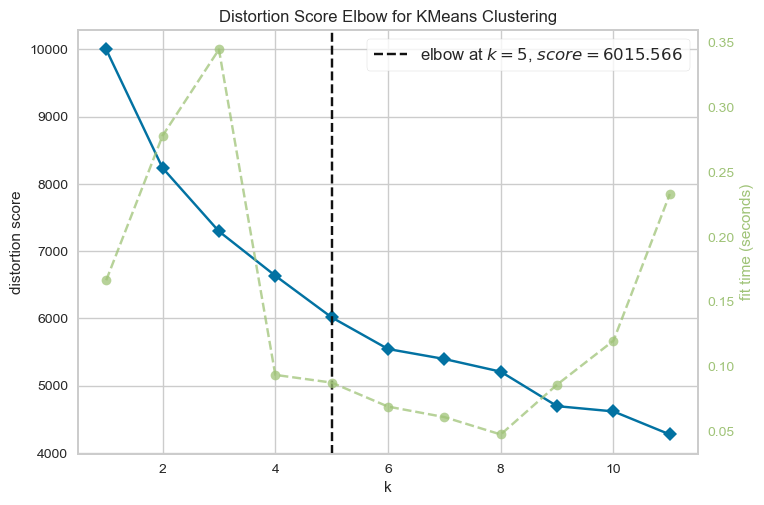

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


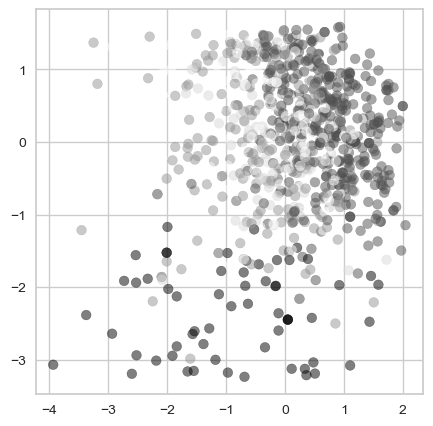

In [30]:
kmeans = cluster.KMeans(n_clusters=5,random_state=0)
kmeans.fit(X) # fit train the model
pred = kmeans.predict(X) #

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

kmeans = cluster.KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=5, linkage='single')
y2_pred = single.fit_predict(X)


print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Model 1 Silhouette Score: 0.14074018620910833
Model 2 Silhouette Score: 0.4253207605423343


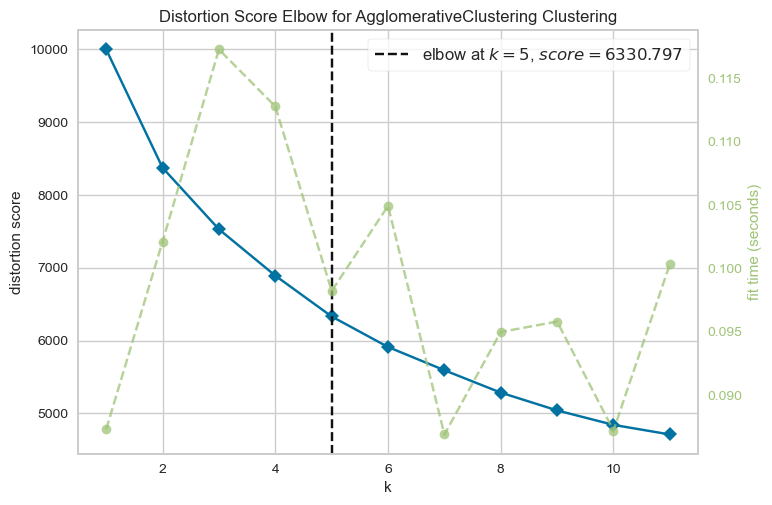

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

In [68]:
single = cluster.AgglomerativeClustering(n_clusters=5, linkage='single')
y2_pred = single.fit_predict(X)


print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

Model 1 Silhouette Score: 0.4253207605423343


In [79]:
#data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn,id,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,215467,0,3,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,216387,0,0,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,220537,0,0,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,151440,0,3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,240800,0,3,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,106588,0,1,7GTzjOCpqZWHI3BIv8Qf9Q,Love Me Like You Do (Tendu 1)
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,198804,0,3,7mwgQf8CJsQQqKpo8WM7s7,Pop Muzik
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,122578,0,1,1cO4DQySXkcW7P2AC9NhXb,Marry You (Tendu 3)
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,175520,0,3,0ovMDuDipUCllG0CjTxgNX,Pop - Radio Version


In [35]:
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
data_cluster["cluster"]= y2_pred

In [127]:
#data_cluster.rename(columns={'Cluster': 'cluster'}, inplace=True)

In [37]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,215467,0
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,216387,0
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,220537,0
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,151440,0
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,240800,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,106588,0
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,198804,0
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,122578,0
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,175520,0


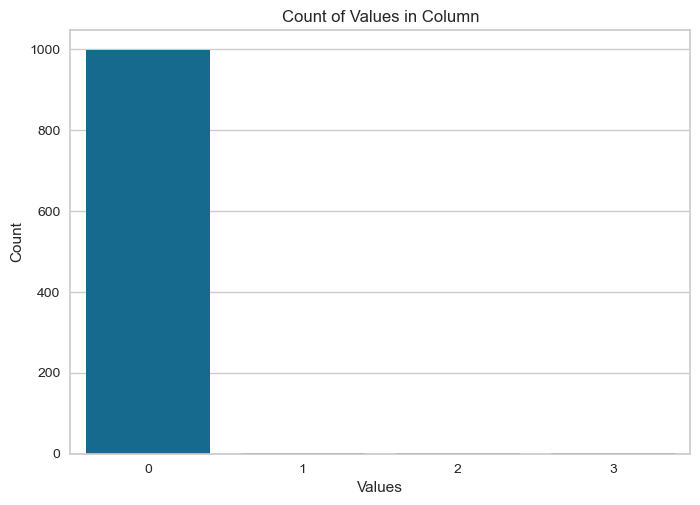

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df and the column is 'column_name'
sns.countplot(x='cluster', data= data_cluster)

# Display the plot
plt.title('Count of Values in Column')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

In [39]:
df_names = df_final[['id','names']]
df_names

,id,names
0,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...
995,7GTzjOCpqZWHI3BIv8Qf9Q,Love Me Like You Do (Tendu 1)
996,7mwgQf8CJsQQqKpo8WM7s7,Pop Muzik
997,1cO4DQySXkcW7P2AC9NhXb,Marry You (Tendu 3)
998,0ovMDuDipUCllG0CjTxgNX,Pop - Radio Version


In [40]:
df_merge = data_cluster.merge(df_names, left_index=True, right_index=True)

In [41]:
df_merge

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,215467,0,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,216387,0,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,220537,0,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,151440,0,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,240800,0,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,106588,0,7GTzjOCpqZWHI3BIv8Qf9Q,Love Me Like You Do (Tendu 1)
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,198804,0,7mwgQf8CJsQQqKpo8WM7s7,Pop Muzik
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,122578,0,1cO4DQySXkcW7P2AC9NhXb,Marry You (Tendu 3)
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,175520,0,0ovMDuDipUCllG0CjTxgNX,Pop - Radio Version


In [86]:
#df_merge.to_csv('../01_data/df_merge_with_clusters.csv')

c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

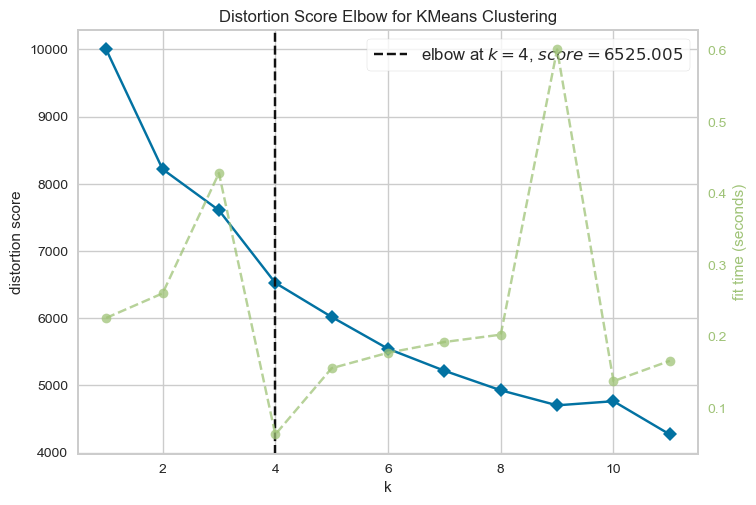

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))# to get the best number of clusters
visualizer.fit(X)
visualizer.poof()

In [70]:
kmeans = cluster.KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y1_pred1 = kmeans.predict(X)



print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred1)))

c:\Users\lored\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Model 1 Silhouette Score: 0.11491234010970075


In [71]:
y1_pred1

array([3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 2, 3, 0, 0, 1, 2, 0,
       2, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 1, 3, 2, 2, 0, 3, 3, 1, 3,
       3, 2, 1, 2, 2, 3, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 0, 3, 2, 3, 0, 2,
       3, 0, 3, 3, 2, 0, 3, 0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 0, 3, 3, 3,
       0, 3, 1, 3, 3, 1, 0, 3, 0, 2, 3, 0, 2, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       2, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 1, 3, 2, 3, 0, 1,
       3, 2, 2, 3, 2, 3, 3, 1, 0, 2, 3, 3, 3, 0, 3, 2, 2, 2, 0, 2, 3, 2,
       2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 2, 0, 2, 3, 0, 3, 2, 3, 3, 1, 3, 1,
       3, 3, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 0, 3, 0, 3, 0, 0, 2, 3, 3, 3,
       2, 2, 0, 2, 3, 2, 3, 0, 1, 2, 2, 3, 3, 2, 0, 2, 2, 0, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 2, 2, 3, 0, 1, 2, 1,
       2, 1, 3, 3, 3, 0, 3, 2, 3, 2, 1, 0, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2,
       3, 2, 2, 3, 0, 0, 0, 2, 0, 0, 3, 1, 3, 3, 3, 3, 1, 3, 0, 2, 3, 3,
       0, 1, 0, 3, 2, 2, 2, 2, 1, 0, 3, 3, 0, 0, 2,

In [73]:
data_cluster["cluster_knn"]= y1_pred1

In [75]:
data_cluster.rename(columns={'cluster': 'cluster_agg'}, inplace=True)

In [76]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,215467,0,3
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,216387,0,0
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,220537,0,0
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,151440,0,3
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,240800,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,106588,0,1
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,198804,0,3
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,122578,0,1
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,175520,0,3


In [78]:
data_cluster= data_cluster.merge(df_names, left_index=True, right_index=True)

In [90]:
data_cluster

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn,id,names
0,0.854,0.674,-6.230,0.1840,0.05170,0.000085,0.5090,0.8480,99.022,215467,0,3,6WzRpISELf3YglGAh7TXcG,Popular (with Playboi Carti & Madonna) - From ...
1,0.548,0.805,-5.732,0.3510,0.21200,0.000405,0.4080,0.6490,142.096,216387,0,0,79s5XnCN4TJKTVMSmOx8Ep,Dior
2,0.461,0.897,-3.982,0.0920,0.00821,0.000000,0.0965,0.3580,165.107,220537,0,0,4GssB27iJeqmfGxS94Tfij,Popular Monster
3,0.784,0.627,-14.617,0.0572,0.04250,0.717000,0.0645,0.9520,136.879,151440,0,3,45aoC0yE3RZGWz5QPb41M1,Popcorn
4,0.769,0.818,-1.385,0.1920,0.26300,0.000000,0.0787,0.9180,88.017,240800,0,3,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372,0.256,-17.894,0.0468,0.98700,0.923000,0.1040,0.0729,86.320,106588,0,1,7GTzjOCpqZWHI3BIv8Qf9Q,Love Me Like You Do (Tendu 1)
996,0.941,0.838,-7.683,0.0345,0.11500,0.000004,0.0717,0.9700,108.902,198804,0,3,7mwgQf8CJsQQqKpo8WM7s7,Pop Muzik
997,0.571,0.265,-18.095,0.0421,0.98000,0.905000,0.2080,0.7220,134.524,122578,0,1,1cO4DQySXkcW7P2AC9NhXb,Marry You (Tendu 3)
998,0.841,0.866,-6.342,0.1180,0.04090,0.000000,0.2120,0.8820,119.943,175520,0,3,0ovMDuDipUCllG0CjTxgNX,Pop - Radio Version


In [80]:
data_cluster.to_csv('../01_data/spotify_pop_songs_1000_cluster.csv')

### Final Playlist

In [44]:
df_final_playlist= pd.read_csv("../01_data/final_playlist.csv")

In [45]:
columns_to_drop = ["id","names"]
X_playlist = df_final_playlist.drop(columns = columns_to_drop)

In [46]:
names_id = df_final_playlist[columns_to_drop]

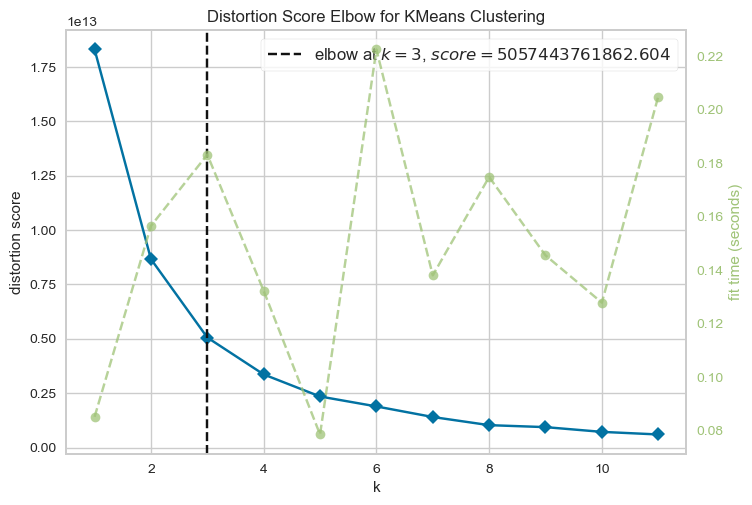

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
agg_model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_playlist)
visualizer.poof()

In [57]:
alg = cluster.AgglomerativeClustering(n_clusters=3, linkage="average")
pred_agg = alg.fit_predict(X_playlist)

In [58]:
silhouette_score(X_playlist, pred_agg, metric='euclidean')

0.7727377155202427

In [59]:
pred_agg

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [60]:
X_playlist["Cluster"] = pred_agg

In [61]:
df_playlist_merged = pd.concat([X_playlist, names_id], axis = 1)

In [62]:
df_playlist_merged

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,2,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,2,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,2,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,2,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,2,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,2,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,2,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,2,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [64]:
df_playlist_merged["Cluster"].value_counts ()

Cluster
2    4594
0      40
1       1
Name: count, dtype: int64

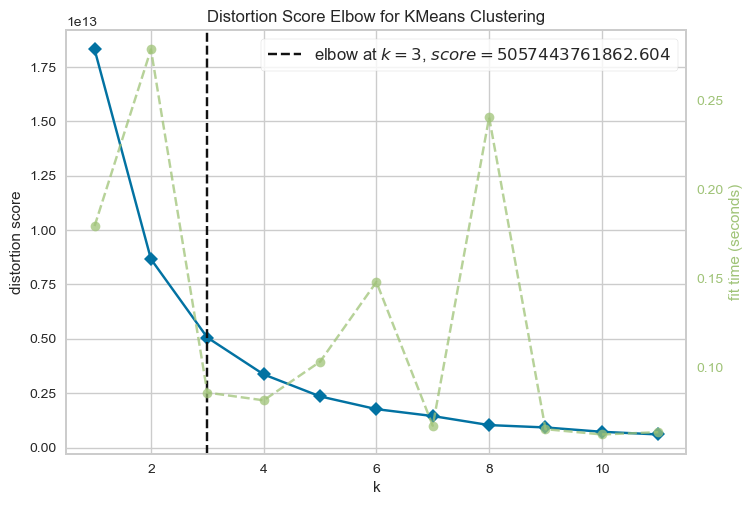

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_playlist)
visualizer.poof()

In [53]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_playlist)
pred = kmeans.predict(X_playlist)

In [54]:
silhouette_score(X_playlist, pred, metric='euclidean')

0.5400041546824723

In [55]:
pred

array([0, 2, 0, ..., 1, 2, 0])

In [65]:
X_playlist["Cluster_kmeans"] = pred

In [66]:
#df_kmean = pd.concat([X_playlist, names_id], axis = 1)

In [67]:
#df_kmean["Cluster_kmeans"].value_counts()

Cluster_kmeans
0    2271
1    1950
2     414
Name: count, dtype: int64

In [84]:
df_playlist_merged = pd.concat([X_playlist, names_id], axis = 1)

In [85]:
df_playlist_merged.rename(columns={'Cluster': 'cluster_agg'}, inplace=True)
df_playlist_merged.rename(columns={'Cluster_kmeans': 'cluster_knn'}, inplace=True)

In [86]:
df_playlist_merged

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_agg,cluster_knn,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467,2,0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147,2,2,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713,2,0,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560,2,1,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093,2,0,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294,2,1,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719,2,0,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192,2,1,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361,2,2,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [87]:
df_playlist_merged.to_csv('../01_data/spotify_songs_5000_cluster.csv')